In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
X = []
Y = []

for i in tqdm(glob('class_data/open_eye/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('class_data/closed_eye/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)

100%|██████████| 41946/41946 [05:54<00:00, 118.39it/s]


In [4]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [5]:
X.shape

(84898, 64, 64)

In [6]:
X = np.expand_dims(X,-1)

In [7]:
X.shape

(84898, 64, 64, 1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25600     
                                                                 
 batch_normalization (Batch  (None, 56, 56, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        1

In [12]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
1422/1422 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.9423
Epoch 1: val_loss improved from inf to 0.13676, saving model to bestModel.h5


c:\Users\mosta\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1422/1422 [==============================] - 457s 319ms/step - loss: 0.1545 - accuracy: 0.9423 - val_loss: 0.1368 - val_accuracy: 0.9509
Epoch 2/30
1422/1422 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9740
Epoch 2: val_loss improved from 0.13676 to 0.09120, saving model to bestModel.h5
1422/1422 [==============================] - 475s 334ms/step - loss: 0.0758 - accuracy: 0.9740 - val_loss: 0.0912 - val_accuracy: 0.9648
Epoch 3/30
1422/1422 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9788
Epoch 3: val_loss did not improve from 0.09120
1422/1422 [==============================] - 454s 319ms/step - loss: 0.0626 - accuracy: 0.9788 - val_loss: 0.1048 - val_accuracy: 0.9611
Epoch 4/30
1422/1422 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9814
Epoch 4: val_loss improved from 0.09120 to 0.04041, saving model to bestModel.h5
1422/1422 [==============================] - 460s 323ms/step - loss: 0.0544 - accuracy

In [13]:
model.evaluate(x_test, y_test)

876/876 [==============================] - 56s 64ms/step - loss: 0.0560 - accuracy: 0.9856


[0.05602824315428734, 0.9855802059173584]

In [14]:
from keras.models import load_model
best_model = load_model('bestModel.h5')
best_model.evaluate(x_test, y_test)

876/876 [==============================] - 56s 63ms/step - loss: 0.0354 - accuracy: 0.9899


[0.035372208803892136, 0.9898632764816284]

1/1 [==============================] - 0s 383ms/step


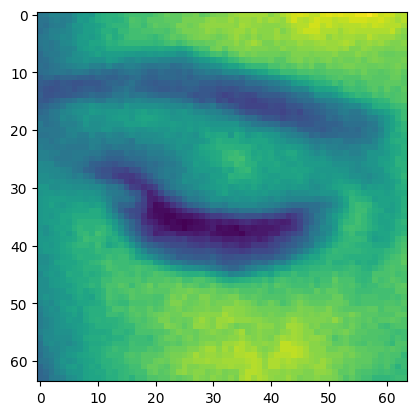

Closed
1/1 [==============================] - 0s 26ms/step


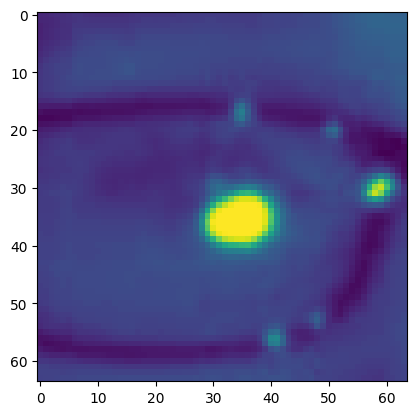

Open
1/1 [==============================] - 0s 47ms/step


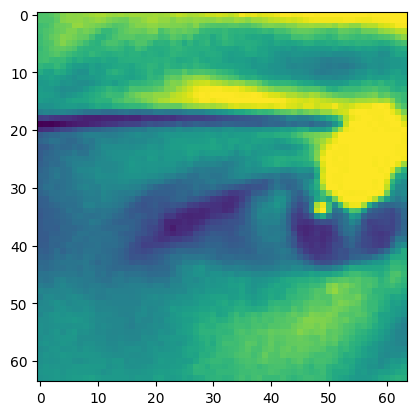

Open
1/1 [==============================] - 0s 31ms/step


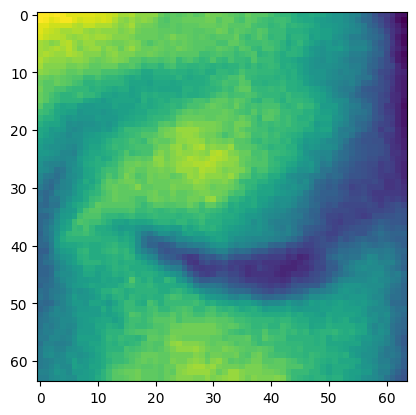

Closed
1/1 [==============================] - 0s 31ms/step


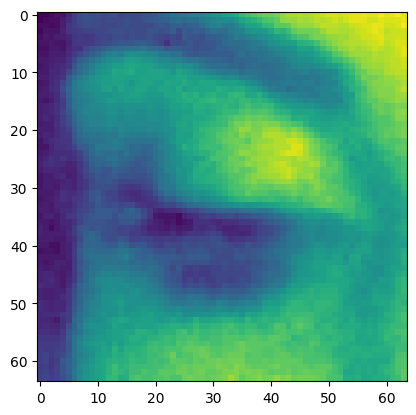

Closed


In [15]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

876/876 [==============================] - 60s 68ms/step


Text(0.5, 25.722222222222214, 'Actual')

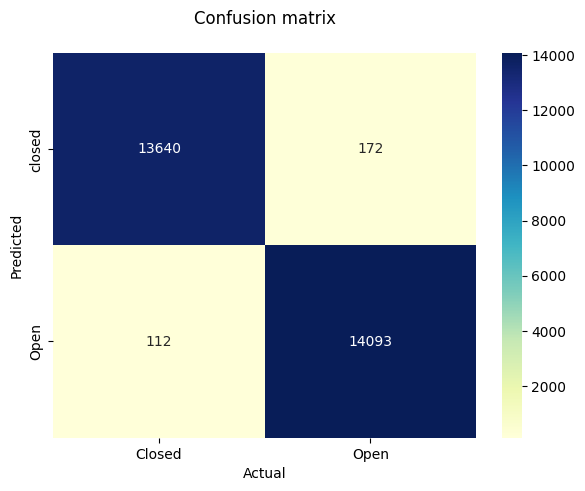

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [19]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[13640   172]
 [  112 14093]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13812
           1       0.99      0.99      0.99     14205

    accuracy                           0.99     28017
   macro avg       0.99      0.99      0.99     28017
weighted avg       0.99      0.99      0.99     28017

